In [3]:
# pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("class_marketing_advertising.csv")
df

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  
0                   Tunisia  2016-03-27 00:53:11              0  
1                     Nauru  2016-04-04 01:39:02              0  
2                San Marino  2016-03-13 20:35:42              0  
3                     Italy  2016-01-10 02:31:19              0  
4                   Iceland  2016-06-03 03:36:18              0  
..                      ...                  ...            ...  
995                 Lebanon  2016-02-11 21:49:00              1  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1  
997                Mongolia  2016-02-01 17:24:57              1  
998               Guatemala  2016-03-24 02:35:54              0  
999                  Brazil  2016-06-03 21:43:21              1  

[1000 rows x 10 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
df.describe().round(2)

Daily Time Spent on Site      Age  Area Income  Daily Internet Usage  \
count                   1000.00  1000.00      1000.00               1000.00   
mean                      65.00    36.01     55000.00                180.00   
std                       15.85     8.79     13414.63                 43.90   
min                       32.60    19.00     13996.50                104.78   
25%                       51.36    29.00     47031.80                138.83   
50%                       68.22    35.00     57012.30                183.13   
75%                       78.55    42.00     65470.63                218.79   
max                       91.43    61.00     79484.80                269.96   

          Male  Clicked on Ad  
count  1000.00         1000.0  
mean      0.48            0.5  
std       0.50            0.5  
min       0.00            0.0  
25%       0.00            0.0  
50%       0.00            0.5  
75%       1.00            1.0  
max       1.00            1.0

<Axes: >

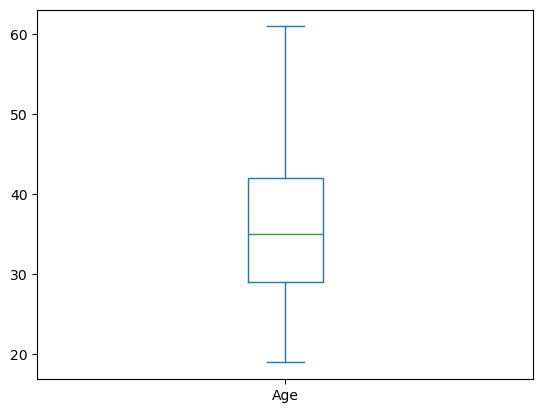

In [6]:
df['Age'].plot(kind='box')

In [7]:
df['Male'].value_counts()

Male
0    519
1    481
Name: count, dtype: int64

In [8]:
df.shape

(1000, 10)

In [9]:
df.columns.tolist()

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Ad Topic Line',
 'City',
 'Male',
 'Country',
 'Timestamp',
 'Clicked on Ad']

In [10]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [11]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [12]:
df.duplicated().sum()

0

In [13]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [95]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

<Axes: >

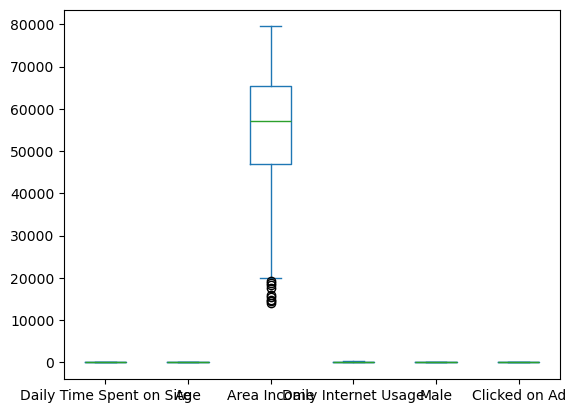

In [15]:
df.plot(kind='box')

<Axes: >

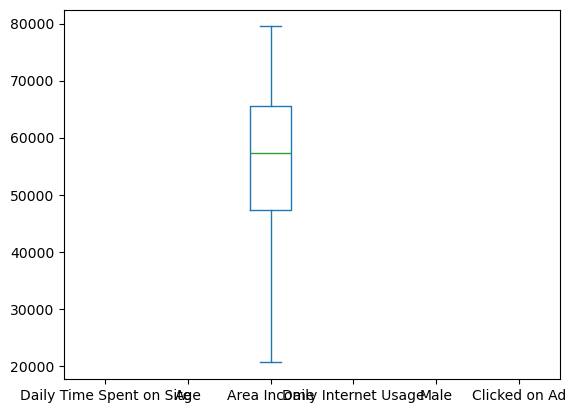

In [16]:
df[df[['Area Income']]>20000].plot(kind='box')

In [17]:
df[df[['Area Income']]<20000].count()

Daily Time Spent on Site     0
Age                          0
Area Income                 10
Daily Internet Usage         0
Ad Topic Line                0
City                         0
Male                         0
Country                      0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [18]:
df.rename(columns={'Male': 'Sex'}, inplace=True)
df

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Sex  \
0       Cloned 5thgeneration orchestration     Wrightburgh    0   
1       Monitored national standardization       West Jodi    1   
2         Organic bottom-line service-desk        Davidton    0   
3    Triple-buffered reciprocal time-frame  West Terrifurt    1   
4            Robust logistical utilization    South Manuel    0   
..                                     ...             ...  ...   
995          Fundamental modular algorithm       Duffystad    1   
996        Grass-roots cohesive monitoring     New Darlene    1   
997           Expanded intangible solution   South Jessica    1   
998   Proactive bandwidth-monitored policy     West Steven    0   
999        Virtual 5thgeneration emulation     Ronniemouth    0   

                    Country            Timestamp  Clicked on Ad  
0                   Tunisia  2016-03-27 00:53:11              0  
1                     Nauru  2016-04-04 01:39:02              0  
2                San Marino  2016-03-13 20:35:42              0  
3                     Italy  2016-01-10 02:31:19              0  
4                   Iceland  2016-06-03 03:36:18              0  
..                      ...                  ...            ...  
995                 Lebanon  2016-02-11 21:49:00              1  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1  
997                Mongolia  2016-02-01 17:24:57              1  
998               Guatemala  2016-03-24 02:35:54              0  
999                  Brazil  2016-06-03 21:43:21              1  

[1000 rows x 10 columns]

In [97]:
def findAgeGroup(Age):
    if Age >= 19 and Age < 25:
        return 1
    elif Age >= 25 and Age < 31:
        return 2
    elif Age >= 31 and Age < 36:
        return 3
    elif Age >= 36 and Age < 41:
        return 4
    elif Age >= 41 and Age < 46:
        return 5
    elif Age >= 46 and Age < 51:
        return 6
    elif Age >= 51 and Age < 56:
        return 7
    else:
        return 8
df['Age_group'] = df.apply(lambda x: findAgeGroup(x['Age']), axis=1)
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Sex     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh    0     Tunisia   
1     Monitored national standardization       West Jodi    1       Nauru   
2       Organic bottom-line service-desk        Davidton    0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt    1       Italy   
4          Robust logistical utilization    South Manuel    0     Iceland   

             Timestamp  Clicked on Ad  Age_group  
0  2016-03-27 00:53:11              0          3  
1  2016-04-04 01:39:02              0          3  
2  2016-03-13 20:35:42              0          2  
3  2016-01-10 02:31:19              0          2  
4  2016-06-03 03:36:18              0          3

In [99]:
X = df.drop(['Clicked on Ad', 'Country', 'City', 'Ad Topic Line', 'Timestamp', 'Age'], axis=1)
y = df['Clicked on Ad']

In [101]:
X

Daily Time Spent on Site  Area Income  Daily Internet Usage  Sex  \
0                       68.95     61833.90                256.09    0   
1                       80.23     68441.85                193.77    1   
2                       69.47     59785.94                236.50    0   
3                       74.15     54806.18                245.89    1   
4                       68.37     73889.99                225.58    0   
..                        ...          ...                   ...  ...   
995                     72.97     71384.57                208.58    1   
996                     51.30     67782.17                134.42    1   
997                     51.63     42415.72                120.37    1   
998                     55.55     41920.79                187.95    0   
999                     45.01     29875.80                178.35    0   

     Age_group  
0            3  
1            3  
2            2  
3            2  
4            3  
..         ...  
995          2  
996          5  
997          7  
998          1  
999          2  

[1000 rows x 5 columns]

In [103]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [105]:
sc = StandardScaler()

In [107]:
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 0.24926659,  0.50969109,  1.73403   , -0.96269532, -0.37575317],
       [ 0.96113227,  1.00253021,  0.31380538,  1.03875025, -0.37575317],
       [ 0.28208309,  0.35694859,  1.28758905, -0.96269532, -0.96195157],
       ...,
       [-0.84377541, -0.93857029, -1.35892388,  1.03875025,  1.96904041],
       [-0.59638946, -0.97548353,  0.18117208, -0.96269532, -1.54814996],
       [-1.26155474, -1.87383208, -0.0376045 , -0.96269532, -0.96195157]])

In [109]:
y_scaled = sc.fit_transform(y.values.reshape(-1,1))
y_scaled

array([[-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
      

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)

In [113]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()

In [115]:
X_train.shape

(800, 5)

In [117]:
y_train.shape

(800, 1)

In [119]:
# --- Parameter Grids ---
param_grid = [
    # Logistic Regression
    {
        'classifier': [lr],
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    # Support Vector Classifier
    {
        'classifier': [svc],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    # Random Forest
    {
        'classifier': [rfc],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    # K-Nearest Neighbors
    {
        'classifier': [knn],
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    }
]


# --- Custom Function for Mapping Predictions ---
def map_predictions(predictions):
    return np.where(predictions == 1, 'yes', 'no')

# --- Pipeline ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', lr)  # Default classifier; replaced during GridSearchCV
])

# --- GridSearchCV ---
gs = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='accuracy')
gs.fit(X_train, y_train)

# --- Best Model and Evaluation ---
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best Parameters: {gs.best_params_}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

C:\Users\sif\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sif\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sif\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sif\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Best Parameters: {'classifier': SVC(), 'classifier__C': 10, 'classifier__kernel': 'linear'}
Accuracy: 0.96
Confusion Matrix:
[[ 86   3]
 [  5 106]]


In [121]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(C=10, kernel='linear'))])

In [123]:
y_pred

array([ 1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,
       -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
        1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
        1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
        1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
        1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,
       -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,
        1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,
        1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1

In [125]:
accuracy

0.96

In [127]:
conf_matrix

array([[ 86,   3],
       [  5, 106]], dtype=int64)

In [129]:
joblib.dump(gs.best_estimator_,'ads_model.pkl')

['ads_model.pkl']

In [131]:
my_model = joblib.load('ads_model.pkl')

In [133]:
y_pred = my_model.predict(X_test)
y_pred_mapped = np.where(y_pred == 1, 'yes', 'no')

In [87]:
y_pred_mapped

array(['yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
       'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 

In [135]:
y_pred

array([ 1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,
       -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
        1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
        1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
        1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
        1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,
       -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,
        1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,
        1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1

In [137]:
print(y.value_counts())

Clicked on Ad
0    500
1    500
Name: count, dtype: int64


In [139]:
test_sample = X_test[0]  # Example row from the test set
prediction = best_model.predict([test_sample])
print("Prediction:", prediction)

Prediction: [1.]
